In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Importing the Keras libraries and packages
from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [59]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.5,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory('data/training',
                                                 target_size = (32, 32),
                                                 batch_size = 4,
                                                 class_mode = 'binary')

#using same sets because not enough pictures in total...
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (32, 32),
                                            batch_size = 4,
                                            class_mode = 'binary')

Found 228 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


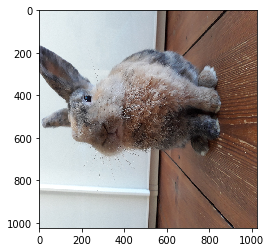

In [60]:
test_image = image.load_img('testing/willy.jpg', target_size = (1024,1024))
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.)

In [61]:
#similar as VGG16

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)
model = Sequential()

model.add(Conv2D(100, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=4096,activation="relu"))
model.add(Dense(128, activation="relu",activity_regularizer=l1(0.001)) )
model.add(Dense(4, activation = 'softmax', activity_regularizer=l1(0.001)))
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 30, 30, 100)       2800      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 30, 30, 64)        57664     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 14400)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               1843328   
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 516       
Total params: 1,904,308
Trainable params: 1,904,308
Non-trainable params: 0
_________________________________________________________________


In [62]:
#model.fit_generator(training_set, steps_per_epoch = 150, epochs = 25, validation_data = test_set, validation_steps = 20)
model.fit_generator(training_set, steps_per_epoch = 150, epochs = 25)

Epoch 1/25
150/150 [==============================] - 197s 1s/step - loss: 1.0237 - acc: 0.5600
Epoch 2/25
150/150 [==============================] - 194s 1s/step - loss: 0.5994 - acc: 0.7833
Epoch 3/25
150/150 [==============================] - 194s 1s/step - loss: 0.4682 - acc: 0.8267
Epoch 4/25
150/150 [==============================] - 194s 1s/step - loss: 0.3653 - acc: 0.8867
Epoch 5/25
150/150 [==============================] - 194s 1s/step - loss: 0.3395 - acc: 0.8967
Epoch 6/25
150/150 [==============================] - 194s 1s/step - loss: 0.3260 - acc: 0.9017
Epoch 7/25
150/150 [==============================] - 194s 1s/step - loss: 0.2504 - acc: 0.9233
Epoch 8/25
150/150 [==============================] - 194s 1s/step - loss: 0.2292 - acc: 0.9433
Epoch 9/25
150/150 [==============================] - 194s 1s/step - loss: 0.2564 - acc: 0.9300
Epoch 10/25
150/150 [==============================] - 194s 1s/step - loss: 0.2141 - acc: 0.9417
Epoch 11/25
150/150 [==================

In [63]:
model.save('trixie2.h5')


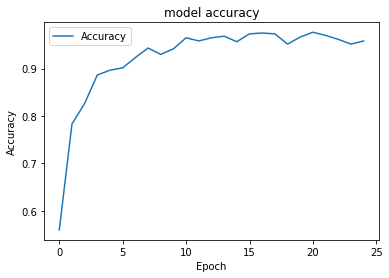

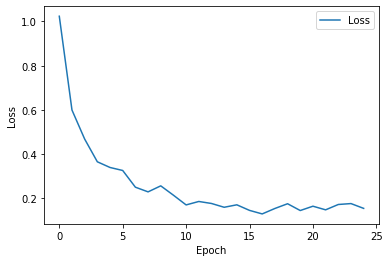

In [64]:
plt.plot(model.history.history["acc"], label = "Accuracy")
#plt.plot(model.history.history['val_acc'], label = 'Val. Accuracy')
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc = 'best')
plt.show()

plt.plot(model.history.history['loss'], label = 'Loss')
#plt.plot(model.history.history['val_loss'], label = 'Val. Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc = 'best')
plt.show()

In [65]:
#model = load_model('trixie.h5')
model = load_model('trixie2.h5')

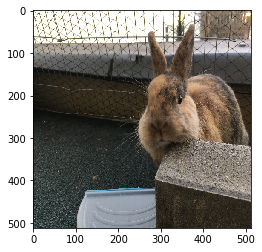

[[0. 0. 0. 1.]]
found hasi: Willy


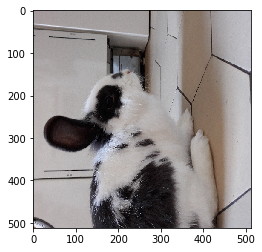

[[0.000000e+00 0.000000e+00 1.000000e+00 4.401109e-24]]
found hasi: Trixie


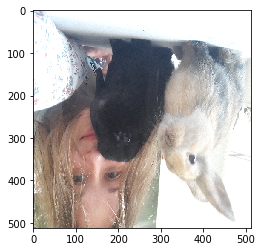

[[1. 0. 0. 0.]]
found hasi: Fienchen


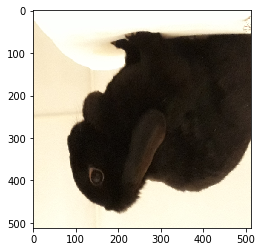

[[0.26940882 0.25538307 0.23322865 0.24197952]]
found hasi: no name found


In [66]:


def predict_hasi_name(path):
    test_image = image.load_img(path, target_size = (32,32))
    test_image = image.img_to_array(test_image)
    
    plot_image = image.load_img(path, target_size = (512,512))
    plot_image = image.img_to_array(plot_image)
    plt.imshow(plot_image/255.)
    plt.show()
    test_image = np.expand_dims(test_image, axis = 0)
    pred =model.predict(test_image)
    classes = training_set.class_indices

    name = 'no name found'
    print(pred)
    for key,value in classes.items():

        if pred[0][value] >= 0.5:
            name = key

        else: 
            continue
    print('found hasi: ' + str(name))
    
    return

predict_hasi_name('testing/willy2.jpg')
predict_hasi_name('testing/trixie.jpg')
predict_hasi_name('testing/willy_und_kruemel.jpg')
predict_hasi_name('testing/fienchen.jpg')